# Data Wrangling - Mallo Guillermo - entrega de clase 29

In [2]:
import pandas as pd
import os

In [6]:
# en el .rar voy a guardar el dataset en una carpeta archivos, para que todo este codigo tenga sentido
os.listdir('archivos/') # buscamos el dataset en la lista del directorio archivos, bank-additional se llama

['athlete_events.csv',
 'bank-additional.csv',
 'books.xml',
 'BTCUSD_1hr.csv',
 'credits.csv',
 'credit_risk_dataset.csv',
 'curva roc.png',
 'dataset.csv',
 'dataset.parquet',
 'dataset.pkl',
 'data_description.txt',
 'defaultoutput.xlsx',
 'dsproyect.mwb',
 'flavors_of_cacao.csv',
 'HRDataset_v14.csv',
 'invoice.yaml',
 'iris.json',
 'iris2.jpeg',
 'iris2.jpg',
 'keywords.csv',
 'Lluvia.pdf',
 'movies_metadata.csv',
 'pandas_multiple.xlsx',
 'pokemon_data.txt',
 'pune_1965_to_2002.csv',
 'test.csv',
 'Time Series Data.csv',
 'train.csv',
 'us_presidents 2.csv',
 'winequality-red.csv']

In [8]:
# ya ubiado el archivo lo importamos con pandas
df = pd.read_csv('archivos/bank-additional.csv', sep=';')

In [10]:
df.shape

(4119, 21)

## Duplicados
contataremos que no tengamso registros duplicados

In [13]:
duplicados = df.duplicated()

In [16]:
df[duplicados]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


## Valores faltantes, nulos y NaN

In [19]:
import missingno as msno

In [20]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<Axes: >

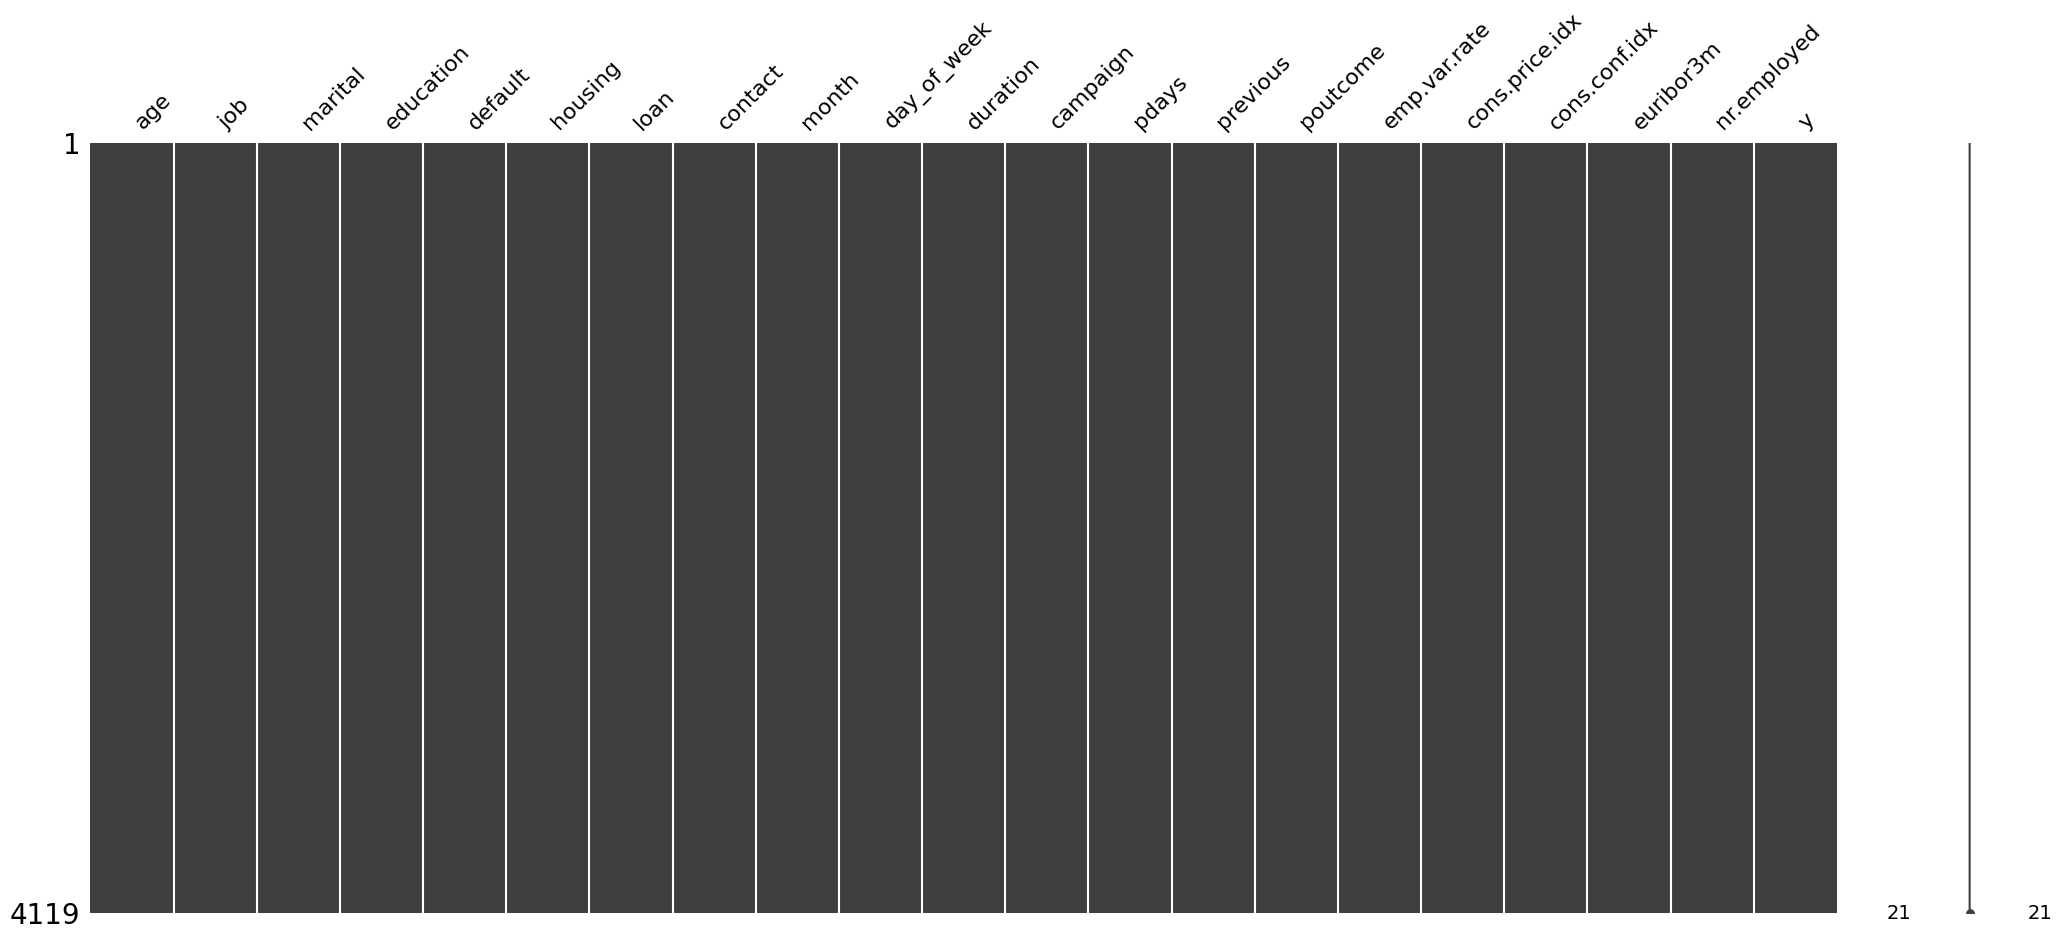

In [21]:
msno.matrix(df)

In [28]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [27]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [32]:
df['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

#### No encontramos NaN, ni tampoco valores mal cargados, como números entre comillas o similares.

# Imputación
nos vamos a tener que saltar este paso, porque no hay nulos para imputar, pero de haberlos usaría el algoritmo de KNN para imputar utilizando los valores de sus vecinos más cercanos.

# Datos atípicos

In [34]:
from sklearn.ensemble import IsolationForest
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

para el analisis predictivo vamos a elegir 2 variables diferentes a las elegidas en la 1er presentacion del traajo final, asi cuando nos toque entrenar modelos vamso a poder probar si llegamos a una mayor eficiencia del modelo, asi que trabajaremos con los datos atipicos de las columnas financieras 'euribor3m' y 'cons.price.idx' que luego de investigar un poco, encontré que la 1ra es tasa promedio a la que se prestan dinero entre si los principales bancos europeos (lo que estaría reflejando el precio del dinero) y la 2da columna es el indice de precios al consumidor en portugal (país donde pertenece el banco cuyo dataset estamos analizando)

emp.var.rate: tasa de variación del empleo (trimestral).

cons.price.idx: índice de precios al consumidor (mensual).

cons.conf.idx: índice de confianza del consumidor (mensual).

euribor3m: tasa Euribor a 3 meses (diaria).

nr.employed: número de empleados (trimestral).

In [39]:
df_2 = df[['euribor3m','cons.price.idx','y']]

In [40]:
df_2# ya tenemos el df sin nan y con las features deseadas para el analisis.

,euribor3m,cons.price.idx,y
0,1.313,92.893,no
1,4.855,93.994,no
2,4.962,94.465,no
3,4.959,94.465,no
4,4.191,93.200,no
...,...,...,...
4114,4.958,93.918,no
4115,4.959,93.918,no
4116,1.354,92.893,no
4117,4.966,93.444,no


<Axes: xlabel='euribor3m', ylabel='cons.price.idx'>

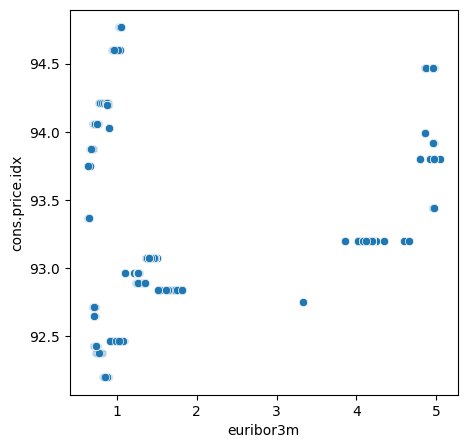

In [54]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
sns.scatterplot(data = df_2, x= 'euribor3m', y = 'cons.price.idx')

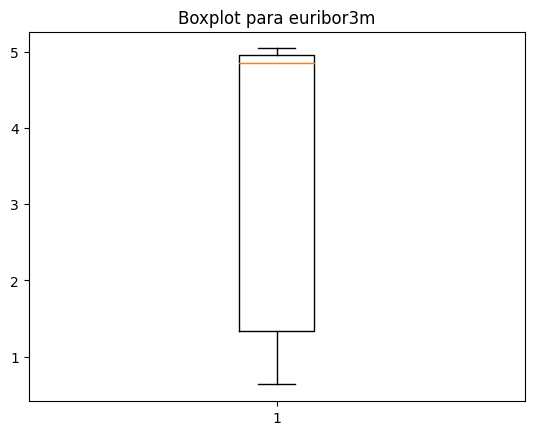

In [49]:
plt.boxplot(df_2['euribor3m'])
plt.title('Boxplot para euribor3m');

In [50]:
df_2['euribor3m'].mean()

3.621355668851663

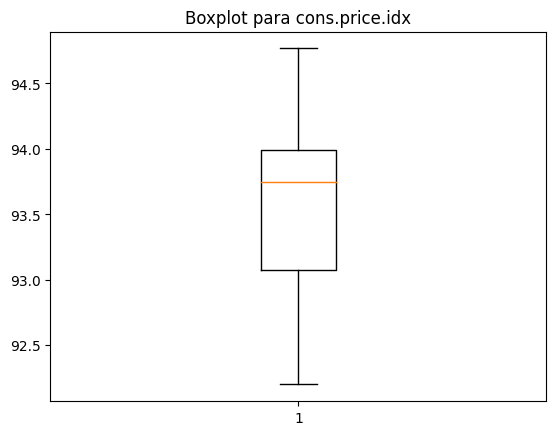

In [51]:
plt.boxplot(df_2['cons.price.idx'])
plt.title('Boxplot para cons.price.idx');

In [57]:
df_2['cons.price.idx'].mean()

93.57970429715951

Graficaré las variables predictoras contra la variable de respuesta para identificar particularidades

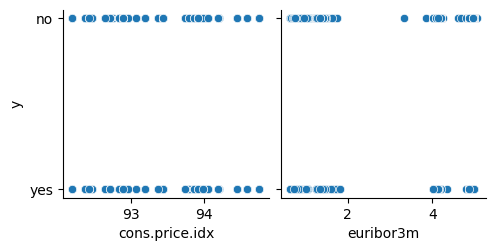

In [55]:
sns.pairplot(data=df_2, x_vars=['cons.price.idx','euribor3m'], y_vars='y')

Gracias a este gráfico podemos ver que en el scatterplot de euribor contra la variable de respuesta los datos tanto para no como para yes se reunen cerca de y por ensima de 4 y cerca y por debajo de 2, dejando un vacio en los valores cercanos a 3 de euribor, lo cual es llamativo

In [62]:
df_2[(df_2['euribor3m'] >= 2) & (df_2['euribor3m'] <= 4)]# podemos ver que en la muestra hay muy pocos registros con valores
# entre 2 y 4

,euribor3m,cons.price.idx,y
1307,3.329,92.756,no
1529,3.853,93.200,no


#### Teniendo una variable de respuesta categórica y binaria, muchos de los graficos que practicamos no nso dan mucha info relevante, por lo que le pedi al profe unnos tips
tips de la clase 31 del profe: 
- generar violin plots al reves, cada variable continua contra mi variable de respuesta
- correlacion de categoricas con categoricas
- se puede hacer encodings
- porcentaje de que 'empleos' o cualquier otra categórica son los que mas contratan... **pero este tipo de analisis ya los hice para la 1er entrega dle trabajo final, asi que nos vamos a centrar en numericas contra categórica**

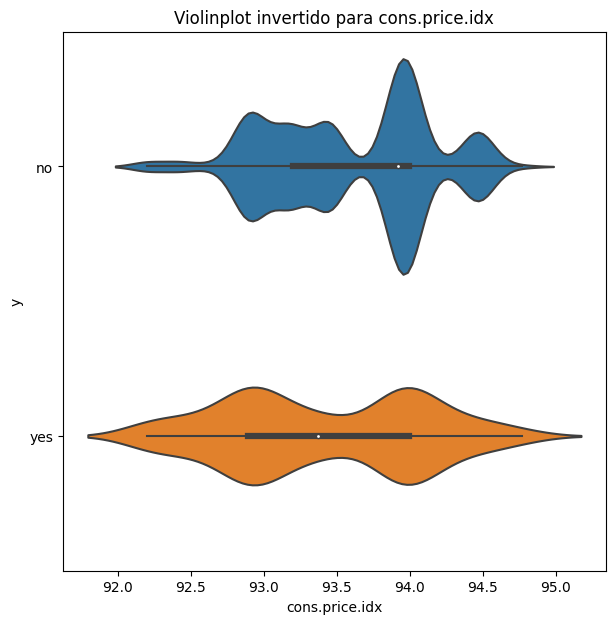

In [69]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
sns.violinplot(x='cons.price.idx', y='y', data=df_2, orient='h')
plt.title('Violinplot invertido para cons.price.idx');

En este violin plot comparamos la indice de precios al consumidor con las ventas del servicio bancario, podmeos ver que los servicios se venden mejor cuando ni son muy altos ni muy bajos, pero tampoco con valores cercanos a la media, es bastante curiosa la forma en la que se comportan. En el caso de las negativas es mas notoria la inversa proporcionalidad en la medida que aumenta el indice de precios. También es algo lógico ya que las personas estan gastando más en la canasta básica por lo que les queda menos dinero libre de su presupuesto para contratar nuevos servicios.

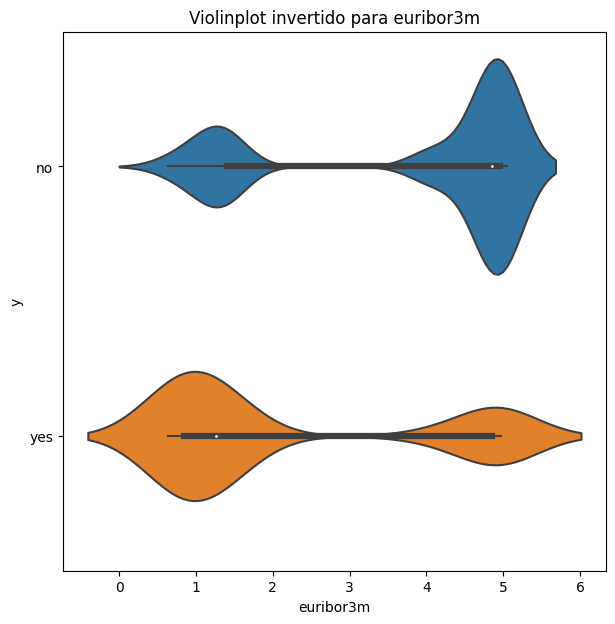

In [70]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
sns.violinplot(x='euribor3m', y='y', data=df_2, orient='h')
plt.title('Violinplot invertido para euribor3m');

Con los violinplots queda muy visual la falta de registros con euribor3m que tome valores cercanos a 3, tambien podemos facilmente identificar que hay una mayor cantidad de aceptaciones del servicio con valores de euribor3m más bajos, l ocual tiene sentido, proque el dinero es más facil de conseguir en esos momentos, por ende la gente está mas dispuesta a contratar más servicios.

### Correlaciones y encoding de variable respuesta

In [75]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [76]:
df_2['y'] = encoder.fit_transform(df_2['y'])# 0 = no  1 = yes

C:\Users\guill\AppData\Local\Temp\ipykernel_7364\3661937408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['y'] = encoder.fit_transform(df_2['y'])


In [77]:
df_2

,euribor3m,cons.price.idx,y
0,1.313,92.893,0
1,4.855,93.994,0
2,4.962,94.465,0
3,4.959,94.465,0
4,4.191,93.200,0
...,...,...,...
4114,4.958,93.918,0
4115,4.959,93.918,0
4116,1.354,92.893,0
4117,4.966,93.444,0


In [79]:
df_2.corr()['y']

euribor3m        -0.298565
cons.price.idx   -0.098326
y                 1.000000
Name: y, dtype: float64

Despues del encoding puedo pedirle a python el coef de correlación entre la variables predict y de resp, y vemos que no hay una correlación DIRECTA entre las variables, lo mismo que pasaba con las variables categóricas selecionadas para la 1er entrega del trabajo final ('job' y 'education')